In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_csv('./../output/slo_montly_data.csv', sep=';')
df.head()

,Group,Journey,AvailabilitySLA,AvailabilitySlo,ExperienceSlo,LatencySLA,LatencySlo,Feature,Source,year,...,month_name,total,ava,ava_prop,ava_debt,exp,exp_prop,exp_debt,lat,lat_debt
0,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Jan,399598.0,395000.0,0.988456,0.001544,391156.0,0.978908,0.011092,0.988277,0.011723
1,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Feb,392950.0,388520.0,0.988811,0.001189,384788.0,0.979183,0.010817,1.020870,0.000000
2,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Mar,418244.0,413587.0,0.988837,0.001163,409668.0,0.979533,0.010467,0.988957,0.011043
3,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Apr,391036.0,386515.0,0.988369,0.001631,382628.0,0.978512,0.011488,0.998299,0.001701
4,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,May,393065.0,388452.0,0.988266,0.001734,385088.0,0.979741,0.010259,1.000371,0.000000


In [15]:
df.columns

Index(['Group', 'Journey', 'AvailabilitySLA', 'AvailabilitySlo',
       'ExperienceSlo', 'LatencySLA', 'LatencySlo', 'Feature', 'Source',
       'year', 'month', 'month_name', 'total', 'ava', 'ava_prop', 'ava_debt',
       'exp', 'exp_prop', 'exp_debt', 'lat', 'lat_debt'],
      dtype='object')

In [82]:

avadf = df.groupby(['Group','Journey','month', 'month_name', 'AvailabilitySLA', 'AvailabilitySlo', 'ExperienceSlo', 'LatencySLA', 'LatencySlo']).aggregate({ 'ava_prop': 'min', 'exp_prop': 'min', 'lat': 'max'}).reset_index()
avadf['ava_debt'] = avadf['AvailabilitySlo'] - avadf['ava_prop']
avadf.loc[avadf['ava_debt'] < 0, 'ava_debt'] = 0

avadf['exp_debt'] = avadf['ExperienceSlo'] - avadf['exp_prop']
avadf.loc[avadf['exp_debt'] < 0, 'exp_debt'] = 0


avadf['lat_debt'] = avadf['LatencySlo'] - avadf['lat']
avadf.loc[avadf['lat_debt'] > 0, 'lat_debt'] = 0
avadf['lat_debt'] = avadf['lat_debt'] * -1



In [86]:
groupdf = avadf.groupby(['month', 'month_name']).aggregate({'ava_prop': 'mean', 'ava_debt': 'sum', 'exp_prop': 'mean', 'exp_debt': 'sum', 'lat': 'mean', 'lat_debt': 'sum'})
groupdf

,,ava_prop,ava_debt,exp_prop,exp_debt,lat,lat_debt
month,month_name,,,,,,
1.0,Jan,0.843879,1.562310,0.848275,1.494982,1.008471,0.555838
2.0,Feb,0.837653,1.631318,0.853405,1.440553,1.019755,0.633828
3.0,Mar,0.845465,1.545794,0.850766,1.468934,1.011343,0.578617
4.0,Apr,0.839603,1.609840,0.851665,1.458707,1.009860,0.561151
5.0,May,0.841977,1.582862,0.849221,1.485455,1.012763,0.575743
6.0,Jun,0.842354,1.580046,0.852445,1.450611,1.007508,0.556060
7.0,Jul,0.843950,1.561979,0.849653,1.480345,1.014794,0.596460
8.0,Aug,0.838240,1.625717,0.851368,1.461534,1.009159,0.561622
9.0,Sep,0.840401,1.601676,0.848387,1.494978,1.010517,0.567288


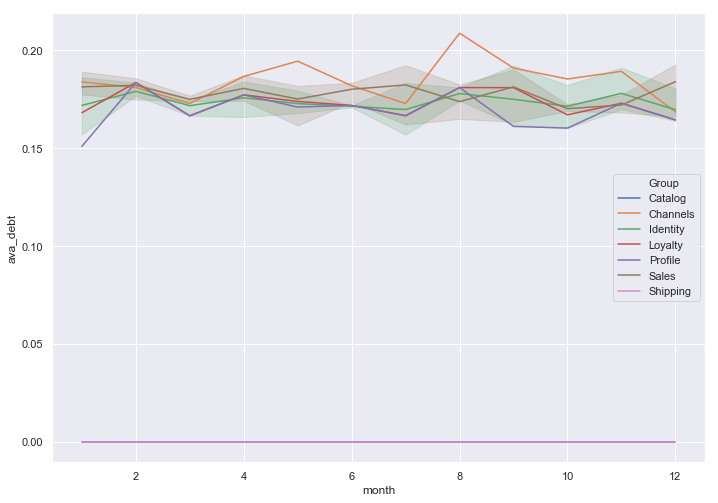

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='month', y='ava_debt', data=avadf, hue="Group")

## Availability debt group report

In [107]:
groupsdf = avadf.groupby(['month','Group']).aggregate({'ava_debt': 'sum'}).reset_index()
groupsdf.pivot(index='Group', columns='month', values='ava_debt')


month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Group,,,,,,,,,,,,
Catalog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Channels,0.183875,0.180925,0.172777,0.186630,0.194439,0.181884,0.172783,0.208725,0.190897,0.185325,0.189227,0.168540
Identity,0.515488,0.537070,0.515118,0.527168,0.518291,0.514232,0.509184,0.533708,0.524903,0.514104,0.533980,0.508953
Loyalty,0.168105,0.183522,0.166519,0.177234,0.173869,0.171835,0.166633,0.180953,0.180897,0.167021,0.172954,0.164428
Profile,0.150922,0.183522,0.166519,0.177234,0.170986,0.171835,0.166497,0.180953,0.161109,0.160245,0.172954,0.164428
Sales,0.543919,0.546278,0.524860,0.541573,0.525278,0.540260,0.546882,0.521377,0.543869,0.510488,0.516110,0.551795
Shipping,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


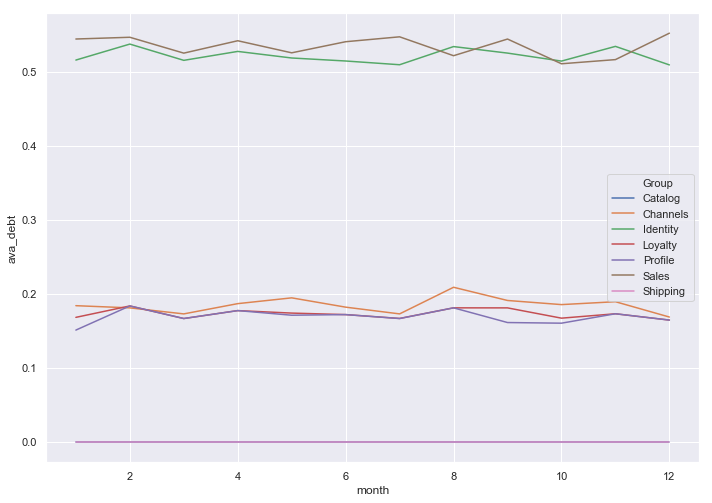

In [108]:
sns.lineplot(x='month', y='ava_debt', data=groupsdf, hue="Group")

In [ ]:
## Experience debt group report

In [109]:
groupsdf = avadf.groupby(['month','Group']).aggregate({'exp_debt': 'sum'}).reset_index()
groupsdf.pivot(index='Group', columns='month', values='exp_debt')

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Group,,,,,,,,,,,,
Catalog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Channels,0.164499,0.157154,0.171854,0.167498,0.173564,0.167488,0.163187,0.162801,0.170175,0.176866,0.155923,0.163055
Identity,0.506502,0.481983,0.488262,0.475054,0.481356,0.479591,0.501659,0.480012,0.485507,0.503104,0.500885,0.494746
Loyalty,0.164229,0.155748,0.158058,0.164326,0.163564,0.162225,0.157933,0.154035,0.156462,0.159040,0.151213,0.159628
Profile,0.146617,0.149994,0.146392,0.153335,0.153935,0.138874,0.153024,0.151514,0.148049,0.159040,0.147216,0.159628
Sales,0.513135,0.495674,0.504369,0.498495,0.513037,0.502434,0.504542,0.513173,0.534785,0.497183,0.500202,0.497645
Shipping,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


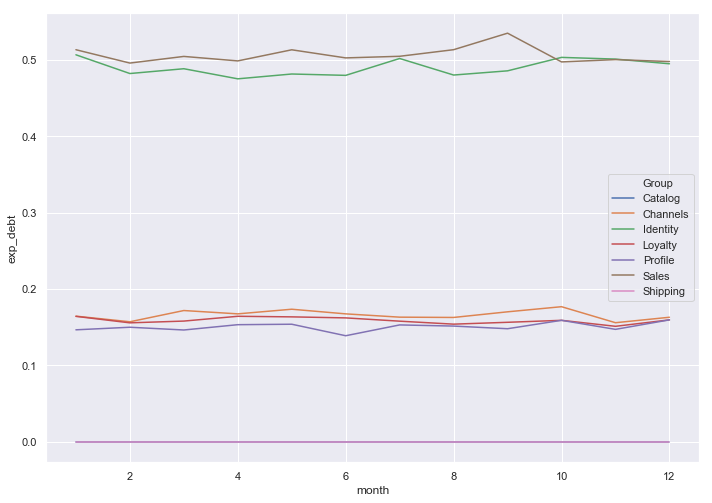

In [111]:
sns.lineplot(x='month', y='exp_debt', data=groupsdf, hue="Group")

In [ ]:
## Debt latency group report

In [112]:
groupsdf = avadf.groupby(['month','Group']).aggregate({'lat_debt': 'sum'}).reset_index()
groupsdf.pivot(index='Group', columns='month', values='lat_debt')

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Group,,,,,,,,,,,,
Catalog,0.009335,0.020870,0.011538,0.011828,0.016317,0.006633,0.016569,0.009783,0.012544,0.014894,0.015216,0.009730
Channels,0.007278,0.018611,0.011538,0.011828,0.016317,0.006850,0.010187,0.009783,0.012544,0.018369,0.006798,0.009730
Identity,0.020555,0.052608,0.032465,0.013838,0.010474,0.025586,0.036567,0.022491,0.017114,0.021578,0.037124,0.021815
Loyalty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Profile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sales,0.518670,0.541739,0.523076,0.523656,0.532635,0.516990,0.533137,0.519566,0.525087,0.529788,0.530432,0.522832
Shipping,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


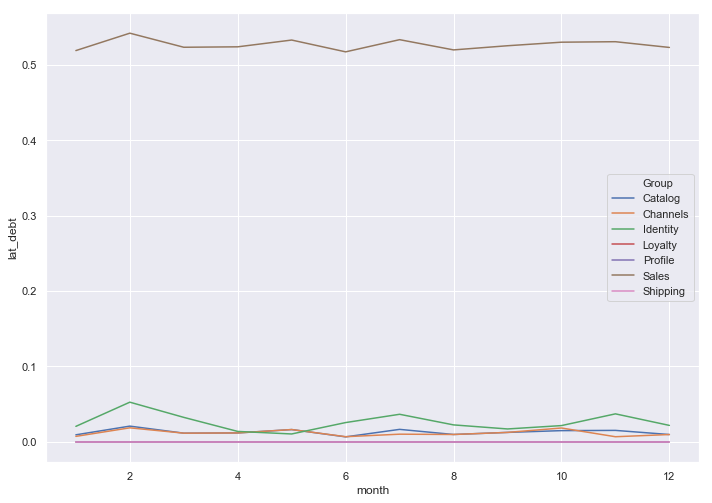

In [113]:
sns.lineplot(x='month', y='lat_debt', data=groupsdf, hue="Group")